#<U>DIWALI SALES ANALYSIS</U>

In this project, I have made an exploratory data analysis of the of the sales which happened during diwali. I have tried to found out the most potential customer group to target in order to increase sales and revenue for the company.

The link for the raw data is: [Diwali_Sales_Analysis](https://drive.google.com/file/d/1xjwJC3EKwokqyCj-1Q8GhAVgRF3X_789/view?usp=sharing).This file is a CSV file with all the data about the sales that happened during diwali.

I have followed these steps while making this project:
<ul><li>Data Filtering</li>
    <li>Exploratory Data Analysis</li>
    <li>Visulisation of Data</li>
    <li>Profile Report</li>
    <li>Short Summary of all the Data with Conclusion</li>
</ul>



In [1]:
#Importing Liabraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Reading CSV file
df = pd.read_csv("Diwali Sales Data.csv", encoding= 'unicode_escape')

#Data Filtering

In [3]:
#Getting Number of Rows and Columns of the Data
df.shape

(11251, 15)

In [4]:
#Getting information of all the data columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


*Here it can be observed that there are 2 columns 'Status and Unnamed' which do not have any value in them. Hence, I am deleting those columns.*

In [5]:
#droping blank columns
df = df.dropna(how = 'all', axis = 1)
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0


In [6]:
#checking for null values

df.isnull().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

*Here we can see that all the columns are fine but column Amount contains 12 null values*

In [7]:
#finding records with amount as null
df[df['Amount'].isnull()]

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
7,1002092,Shivangi,P00273442,F,55+,61,0,Maharashtra,Western,IT Sector,Auto,1,NaN
14,1003858,Cano,P00293742,M,46-50,46,1,Madhya Pradesh,Central,Hospitality,Auto,3,NaN
16,1005447,Amy,P00275642,F,46-50,48,1,Andhra Pradesh,Southern,IT Sector,Auto,3,NaN
109,1005265,Sakshi,P00296242,F,46-50,48,1,Delhi,Central,Banking,Footwear & Shoes,1,NaN
111,1005261,Apoorva,P00057942,F,36-45,41,1,Delhi,Central,IT Sector,Footwear & Shoes,2,NaN
184,1005538,Kartik,P00269542,F,46-50,49,1,Karnataka,Southern,Banking,Footwear & Shoes,1,NaN
293,1000326,Jonathan,P00120542,M,51-55,53,0,Gujarat,Western,IT Sector,Footwear & Shoes,3,NaN
344,1002507,Lakshmi,P00045842,F,26-35,35,1,Gujarat,Western,Chemical,Furniture,1,NaN
345,1004498,Srishti,P00030842,F,51-55,55,0,Delhi,Central,Textile,Footwear & Shoes,1,NaN
452,1004601,Gaurav,P00014442,F,36-45,40,1,Madhya Pradesh,Central,Hospitality,Food,4,NaN


In [8]:
#replacing null values of amount with its mean value

df.loc[df['Amount'].isnull(), 'Amount'] = df['Amount'].mean()

In [9]:
#checking if the values are replaced or not
df.isnull().sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [10]:
#converting amount datatype to int
df['Amount'] = df['Amount'].astype('int')
df.dtypes #to see the conversion


User_ID              int64
Cust_name           object
Product_ID          object
Gender              object
Age Group           object
Age                  int64
Marital_Status       int64
State               object
Zone                object
Occupation          object
Product_Category    object
Orders               int64
Amount               int64
dtype: object

In [11]:
##checking for the details of the data in the DataFrame (i.e. count, mean, std, etc)

df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.125100e+04,11251.000000,11251.000000,11251.000000,11251.000000
mean,1.003004e+06,35.421207,0.420318,2.489290,9453.609901
std,1.716125e+03,12.754122,0.493632,1.115047,5219.569169
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,1.500000,5443.500000
50%,1.003065e+06,33.000000,0.000000,2.000000,8110.000000
75%,1.004430e+06,43.000000,1.000000,3.000000,12671.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [12]:
#checking for duplicate values

df[df.duplicated( keep = False)].set_index('User_ID')

,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
User_ID,,,,,,,,,,,,
1001883,Praneet,P00029842,M,51-55,54,1,Uttar Pradesh,Central,Hospitality,Auto,1,23568
1001883,Praneet,P00029842,M,51-55,54,1,Uttar Pradesh,Central,Hospitality,Auto,1,23568
1004725,Jackson,P00150842,F,36-45,37,1,Maharashtra,Western,Hospitality,Electronics & Gadgets,4,9859
1004725,Jackson,P00150842,F,36-45,37,1,Maharashtra,Western,Hospitality,Electronics & Gadgets,4,9859
1003208,Bowman,P00171642,F,26-35,31,0,Bihar,Eastern,Agriculture,Electronics & Gadgets,4,8088
1003208,Bowman,P00171642,F,26-35,31,0,Bihar,Eastern,Agriculture,Electronics & Gadgets,4,8088
1001260,Dheeraj,P00344042,M,26-35,28,0,Maharashtra,Western,IT Sector,Electronics & Gadgets,4,8015
1001260,Dheeraj,P00344042,M,26-35,28,0,Maharashtra,Western,IT Sector,Electronics & Gadgets,4,8015
1001325,Reese,P00111742,F,26-35,27,1,Gujarat,Western,Construction,Electronics & Gadgets,3,7923


In [13]:
#deleting duplicate values

df.drop_duplicates(inplace = True)

In [14]:
#again checking for duplicate values
df[df.duplicated(keep= False)]

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount


#Exloratory Data Analysis (EDA) and Visulaisation


##Gender

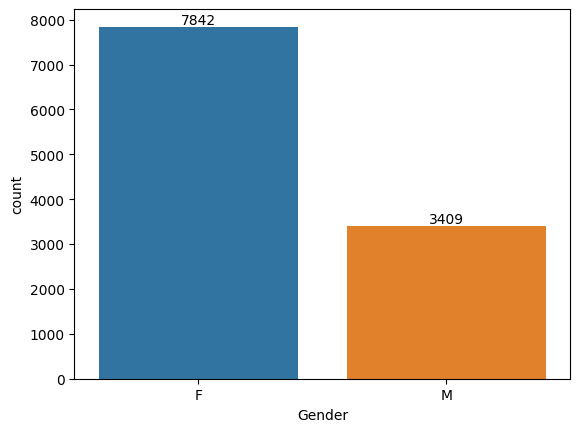

In [40]:
# plotting a bar chart for Gender and it's count

ax = sns.countplot(data = df, x = 'Gender')

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Gender', ylabel='Amount'>

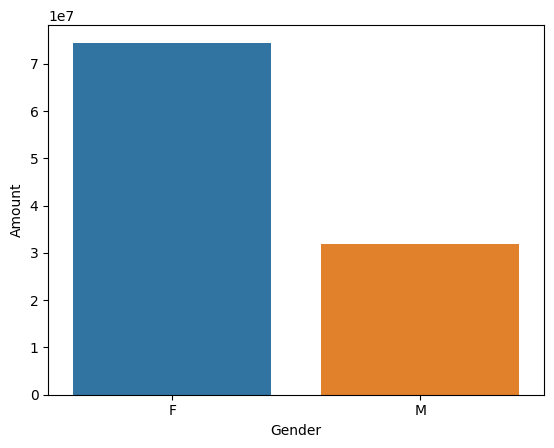

In [45]:
# plotting a bar chart for gender vs total amount

sales_gen = df.groupby(['Gender'])['Amount'].sum().reset_index()
sns.barplot(data = sales_gen, x = 'Gender', y = 'Amount')


*From above graphs we can see that most of the buyers are females and even the
purchasing power of females are greater than men*

##Age


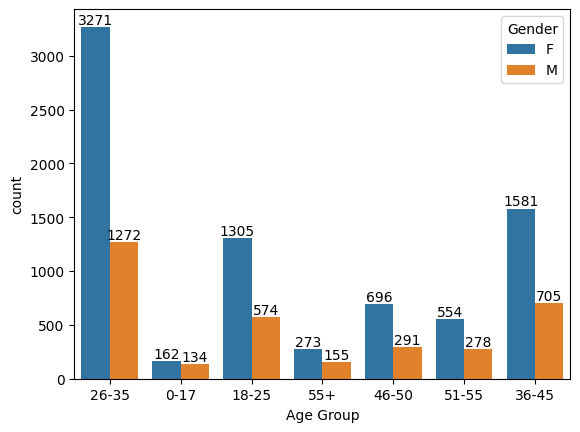

In [48]:
#Plotting the graph for the count across Age group and Gender

ax = sns.countplot(data = df, x = 'Age Group', hue = 'Gender')

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Age Group', ylabel='Amount'>

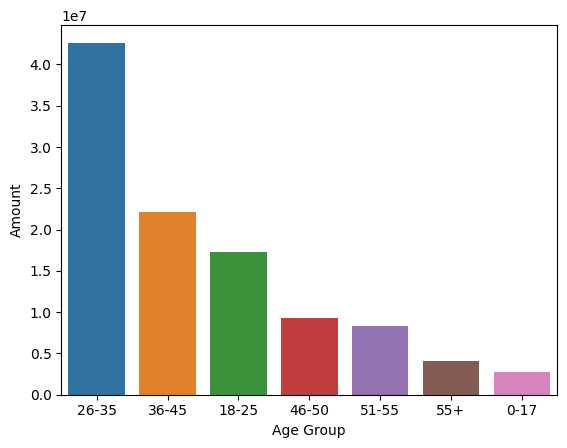

In [53]:
#Plotting Graph for Total amount vs Age Group

Age_Amount = df.groupby(['Age Group'])['Amount'].sum().reset_index().sort_values('Amount', ascending = False)

sns.barplot(data = Age_Amount, x = 'Age Group', y = 'Amount' )

*From above graphs we can see that most of the buyers are of age group between 26-35 yrs female*

##State

<Axes: xlabel='State', ylabel='Orders'>

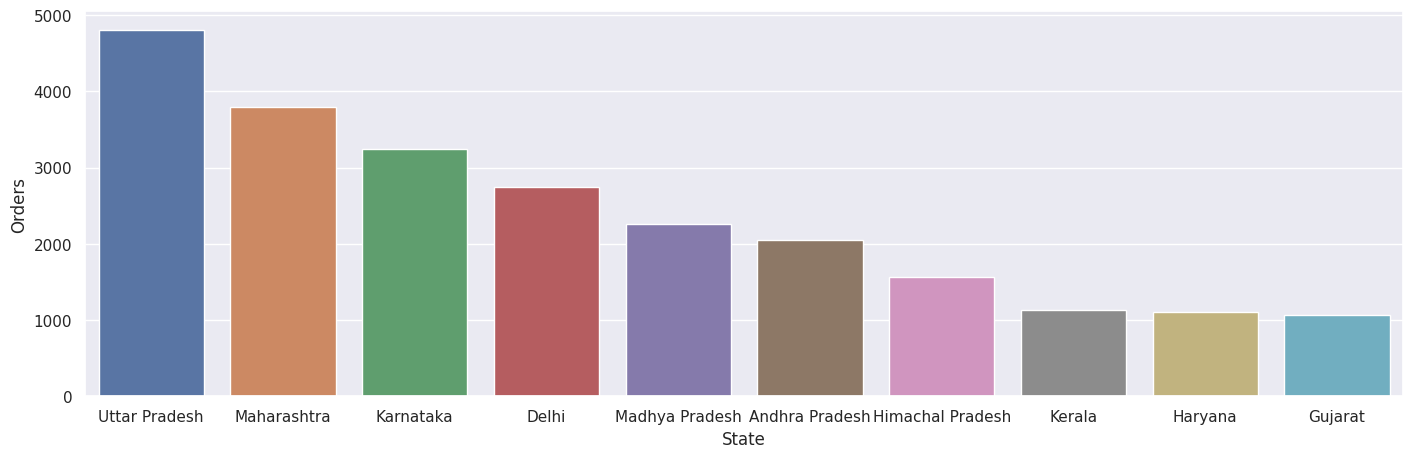

In [15]:
# total number of orders from top 10 states

sales_state = df.groupby(['State'])['Orders'].sum().reset_index().sort_values('Orders', ascending = False).head(10)
a = sales_state.reset_index()
a = a.drop('index', axis = 1)
sns.set(rc={'figure.figsize':(17,5)})
sns.barplot(data = a, x = 'State', y = 'Orders')


<Axes: xlabel='State', ylabel='Amount'>

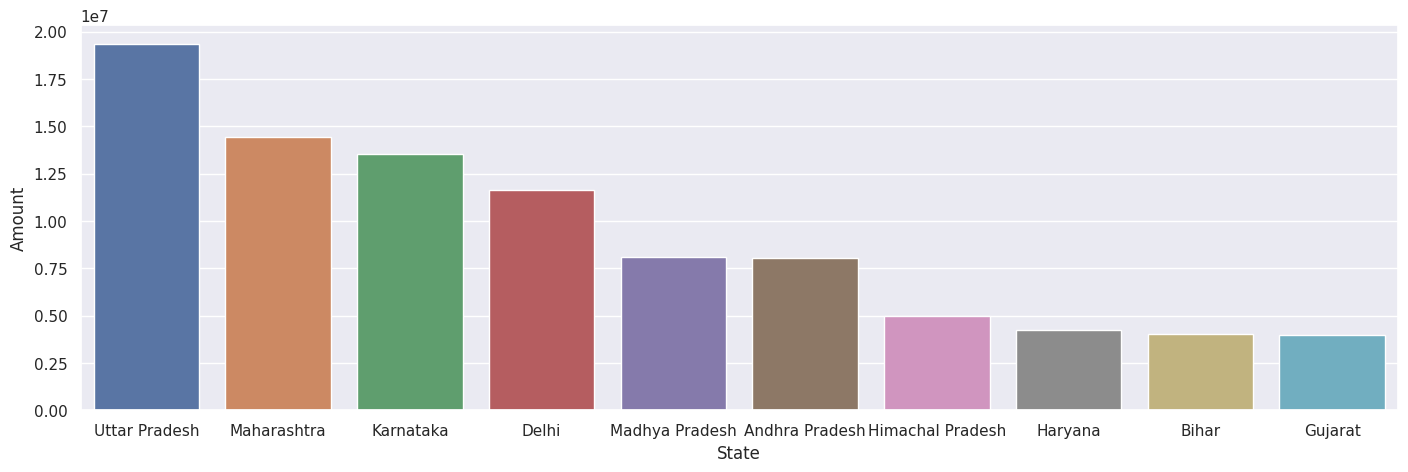

In [16]:
# total amount/sales from top 10 states

State_Amount = df.groupby(['State'])['Amount'].sum().reset_index().sort_values('Amount', ascending = False).head(10)
State_Amount
sns.barplot(data = State_Amount, x = 'State', y = 'Amount')

*From above graphs we can see that most of the orders & total sales/amount are from Uttar Pradesh, Maharashtra and Karnataka respectively*

## Marital Status

<Axes: xlabel='Marital_Status', ylabel='count'>

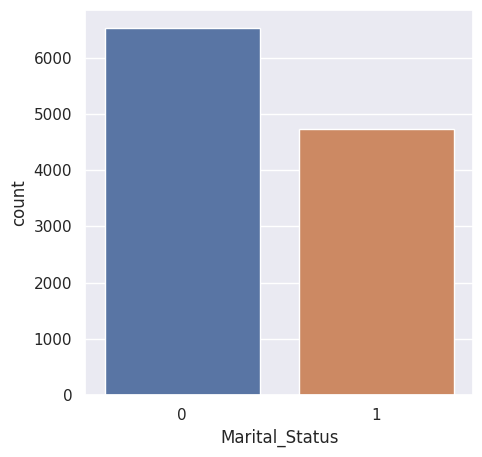

In [89]:
# plotting a graph for the count of marital status
sns.set(rc={'figure.figsize':(5,5)})

sns.countplot(data = df, x = 'Marital_Status')

<Axes: xlabel='Marital_Status', ylabel='Amount'>

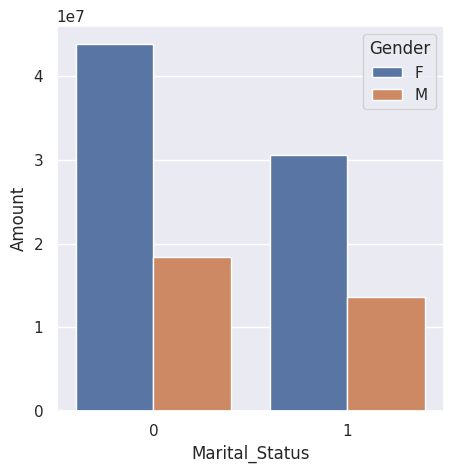

In [92]:
#sales across people of different marital status and gender
temp = df.groupby(['Marital_Status','Gender'])['Amount'].sum().reset_index()
sns.barplot(data = temp, x = 'Marital_Status', y = 'Amount', hue = 'Gender')


*From above graphs we can see that most of the buyers are married (women) and they have high purchasing power*

##Occupation

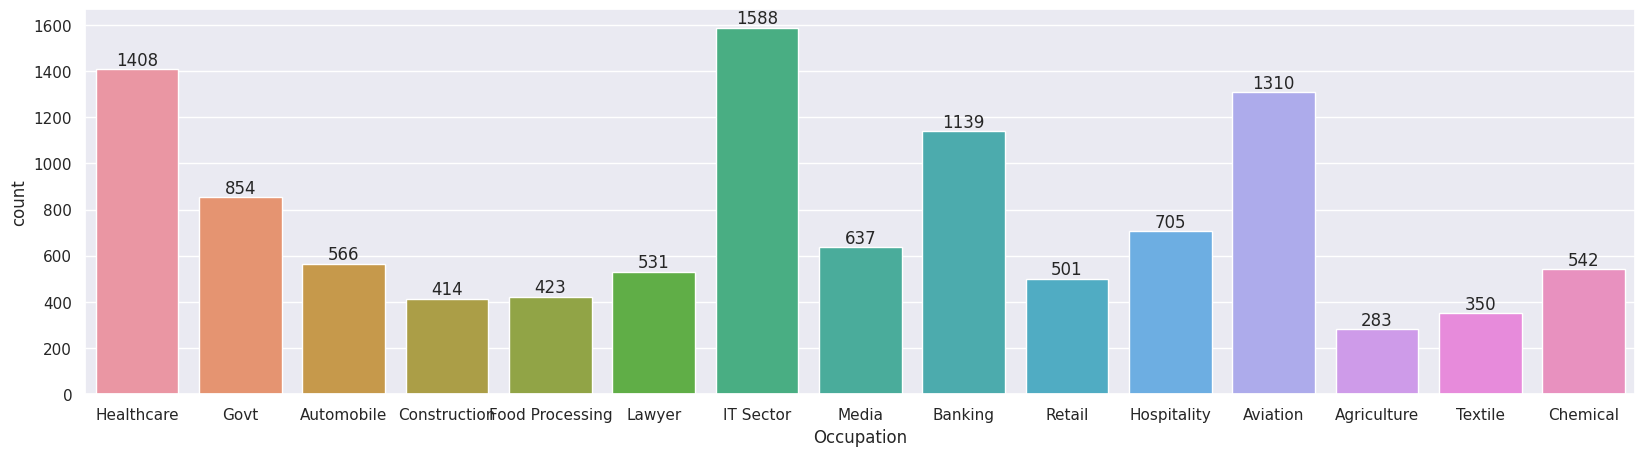

In [100]:
#geting count of people in different occupation
sns.set(rc={'figure.figsize':(20,5)})

ax = sns.countplot(data = df, x = 'Occupation')

for bars in ax.containers:
  ax.bar_label(bars)

<Axes: xlabel='Occupation', ylabel='Amount'>

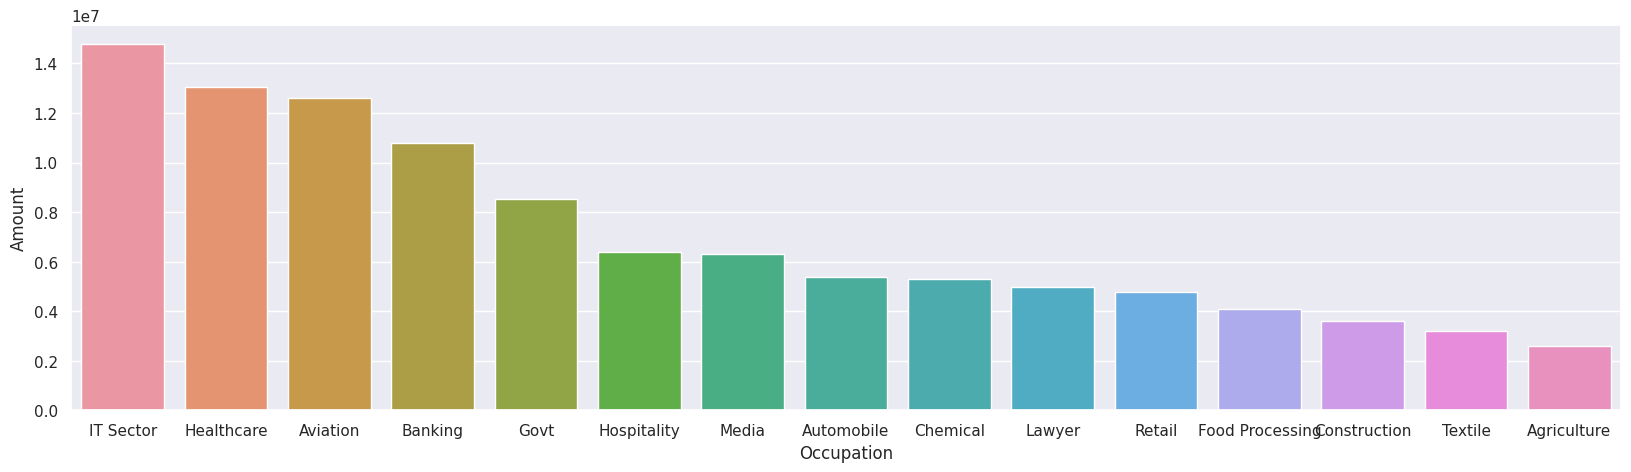

In [103]:
#purchase done by people of different occupations

temp = df.groupby(['Occupation'])['Amount'].sum().reset_index().sort_values('Amount', ascending = False)
sns.barplot(data = temp, x = 'Occupation', y = 'Amount')

*From above graphs we can see that most of the buyers are working in IT, Healthcare and Aviation sector*

## Product Category

<Axes: xlabel='Product_Category', ylabel='Amount'>

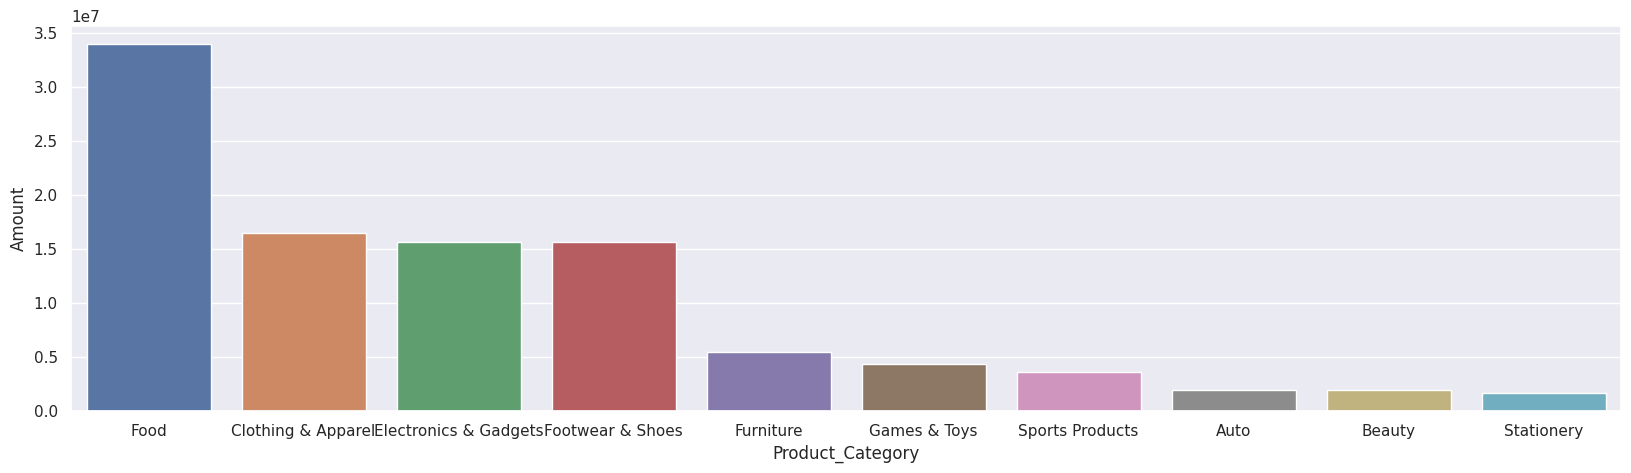

In [108]:
#sales done in different product category

temp = df.groupby(['Product_Category'])['Amount'].sum().reset_index().sort_values('Amount', ascending = False).head(10)

sns.barplot(data = temp, x = 'Product_Category', y = 'Amount')

*From above graphs we can see that most of the sold products are from Food, Clothing and Electronics category*

###Top 10 most selling products quantity and amount wise

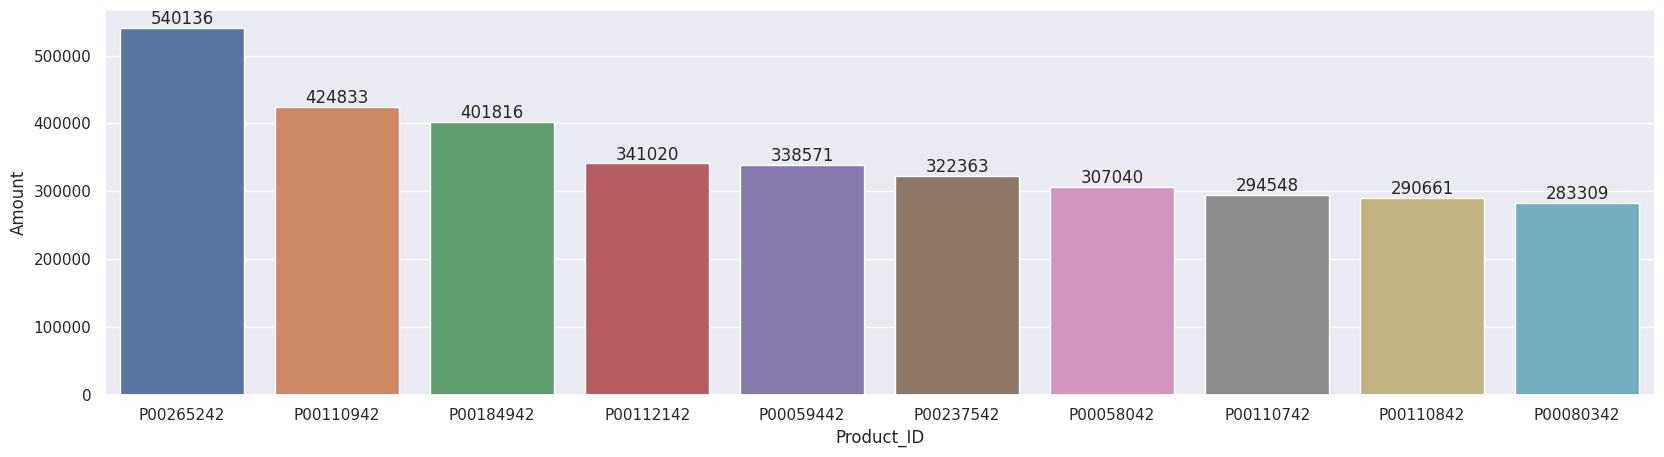

In [130]:
#Amount Wise
temp = pd.pivot_table(data = df, index = 'Product_ID', values = 'Amount', aggfunc = 'sum').reset_index().sort_values('Amount', ascending = False).head(10)
ax = sns.barplot(data = temp, x = 'Product_ID', y = 'Amount')



for bars in ax.containers:
  ax.bar_label(bars)

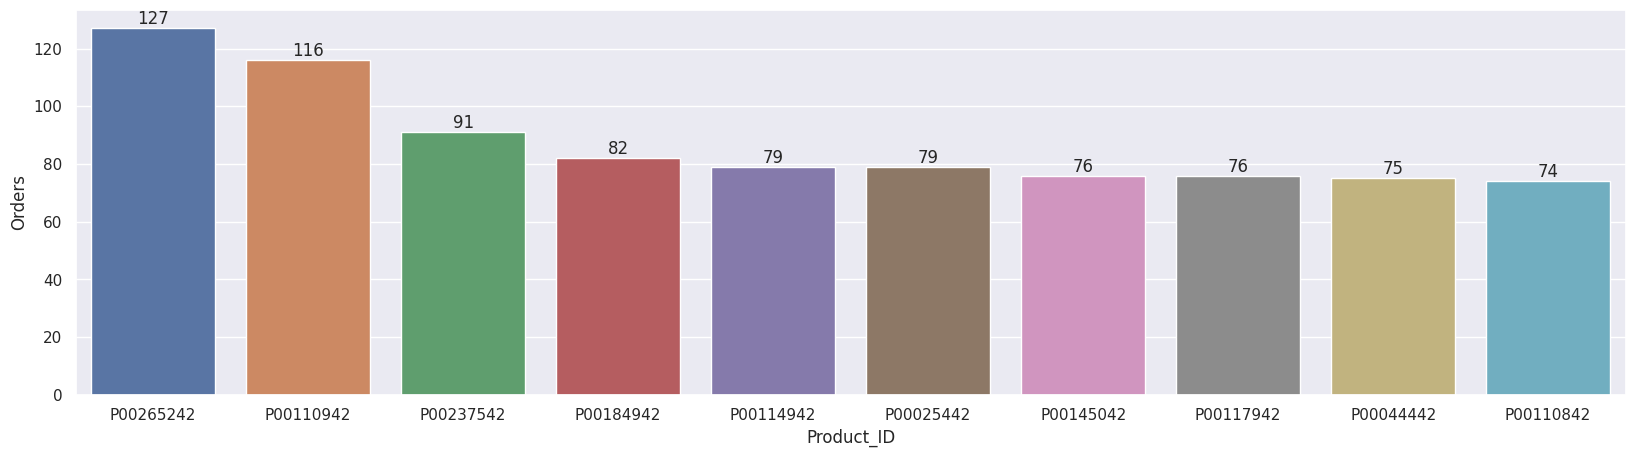

In [131]:
# Quantity wise
temp = pd.pivot_table(data = df, index = 'Product_ID', values = 'Orders', aggfunc = 'sum').reset_index().sort_values('Orders', ascending = False).head(10)
ax = sns.barplot(data = temp, x = 'Product_ID', y = 'Orders')

for bars in ax.containers:
  ax.bar_label(bars)

#Profile Report

*In this part I have made the profile report of the data to understand the data more deeply and make sure that I have not missed anything important in the data.*

In [ ]:
#installing pandas profiling
pip install pandas_profiling

In [133]:
#extracting ProfileRepot
from pandas_profiling import ProfileReport

In [135]:
#Reading CSV file again to get the raw data
df = pd.read_csv('Diwali Sales Data.csv',encoding= 'unicode_escape')

In [ ]:
#creating profile report of the data
profile = ProfileReport(df, title = "Diwali_Sales_Report", explorative= True)
profile

#Conclusion

<i><b>I observed that, married women in age group 26-35 years for Uttar Pradesh, Maharastra and Karnataka working in IT, Healthcare and Aviation are more likely to buy products in category Food, Clothing and Electronics.</b></i>